# ETL

### 載入資料

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install pandas
! pip install openpyxl
! pip install matplotlib
! pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

### 查看資料

In [ ]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,month_added,month_name_added,year_added,age_group,trans_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],9,September,2021,13+,USA
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",9,September,2021,18+,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac...",9,September,2021,18+,USA


In [ ]:
# 看缺失情況
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# 檢查有幾筆重複資料
print(data.duplicated().sum())

0


In [ ]:
# 查看資料筆數及欄位
data.shape

(8807, 12)

In [ ]:
# 查看有那些欄位
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


### 補缺值

In [ ]:
# 填補欄位缺值

data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'].replace(np.nan, 'No Data',inplace  = True)


/tmp/ipython-input-11-2158557615.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cast'].replace(np.nan, 'No Data',inplace  = True)
/tmp/ipython-input-11-2158557615.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
# 刪除缺失及重複值欄位
# Drops
data.dropna(inplace=True)

# Drop Duplicates
# data.drop_duplicates(inplace= True)

In [ ]:
# 看缺失情況
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          8804 non-null   object
 5   country       8804 non-null   object
 6   date_added    8804 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8804 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


(8804, 12)

### 欄位轉換

#### 日期轉換

In [ ]:
# 拆解 date_added 為日期格式
data["date_added"] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')


# 拆出年與月
data['month_added']=data['date_added'].dt.month.astype('Int64')
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year.astype('Int64')

data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac...",9,September,2021


#### 分級轉換

In [ ]:
# rating轉換成年齡
def map_rating_to_age(rating):
    if rating in ['G', 'TV-Y', 'TV-G']:
        return 'All Ages'
    elif rating in ['PG', 'TV-PG']:
        return '10+'
    elif rating in ['PG-13', 'TV-14']:
        return '13+'
    elif rating in ['R']:
        return '17+'
    elif rating in ['TV-MA', 'NC-17']:
        return '18+'
    else:
        return 'Unknown'

data['age_group'] = data['rating'].apply(map_rating_to_age)

data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,month_added,month_name_added,year_added,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],9,September,2021,13+
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",9,September,2021,18+
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac...",9,September,2021,18+


#### 地區轉換

In [ ]:
data['trans_country'] = data['country'].apply(lambda x: x.split(",")[0])


data['trans_country'].replace('United States', 'USA', inplace=True)
data['trans_country'].replace('United Kingdom', 'UK',inplace=True)
data['trans_country'].replace('South Korea', 'S. Korea',inplace=True)


/tmp/ipython-input-18-1911503187.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['trans_country'].replace('United States', 'USA', inplace=True)
/tmp/ipython-input-18-1911503187.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

#### 電影類型分割

In [ ]:
# 欄位拆解
data['genres'] = data['listed_in'].str.split(', ')

# Apply string operations to elements within the lists
data['genres'] = data['genres'].apply(lambda x: [item.strip("[]").replace("'", "") for item in x])
data['genres'] = data['genres'].apply(lambda x: tuple(x))

data.head(3)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,month_added,month_name_added,year_added,age_group,trans_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","(Documentaries,)",9,September,2021,13+,USA
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","(International TV Shows, TV Dramas, TV Mysteries)",9,September,2021,18+,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"(Crime TV Shows, International TV Shows, TV Ac...",9,September,2021,18+,USA


#### 影片類型分割

In [ ]:
# Filter for movies
df_movies = data[data["type"] == "Movie"]

# Count individual genres in movies
movie_genres = df_movies['genres'].explode().value_counts()
###############################################################
df_tvshows = data[data["type"] == "TV Show"]

# Count individual genres in TV shows
tvshow_genres = df_tvshows['genres'].explode().value_counts()


In [ ]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,month_added,month_name_added,year_added,age_group,trans_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],9,September,2021,13+,USA
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",9,September,2021,18+,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac...",9,September,2021,18+,USA


### 儲存清理後的資料

In [ ]:
# 儲存為 CSV
data.to_csv("/content/drive/MyDrive/cleaned_Netflix.csv", index=False)

# EDA

### Movie & TV show

<Axes: xlabel='type', ylabel='count'>

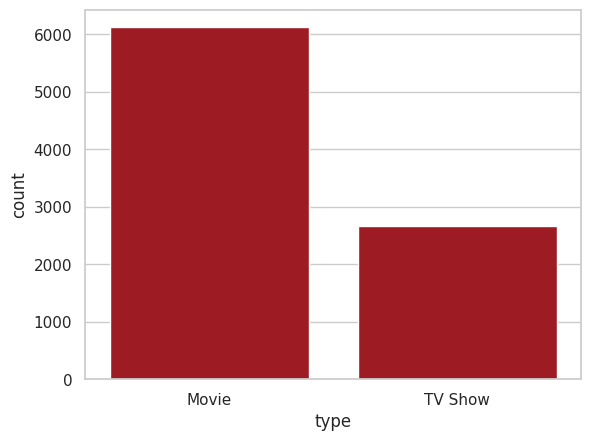

In [ ]:
sns.set_palette(netflix_palette)
sns.countplot(data=data, x="type", color='#b20710')

#### Top10 Genre in Movies

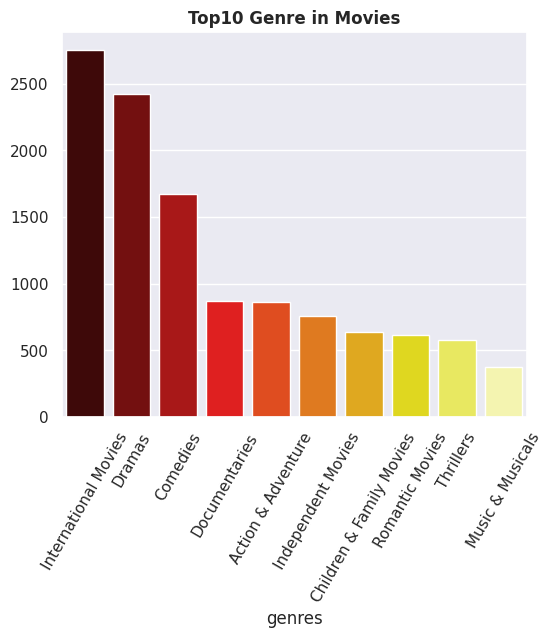

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x = movie_genres.head(10).index,
      y = movie_genres.head(10).values,
      palette="hot")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

#### Top10 Genre in TV Shows

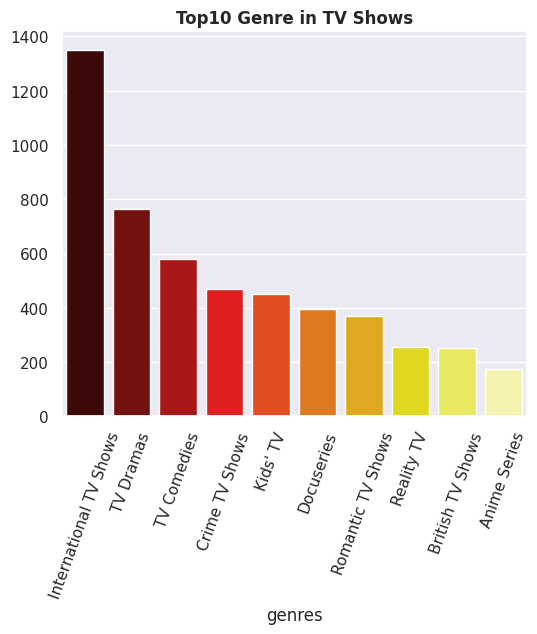

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x = tvshow_genres.head(10).index,
      y = tvshow_genres.head(10).values,
      palette="hot")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

### Country

In [ ]:
import plotly.express as px #distribution according to countries
top_rated=data[0:50]
fig =px.sunburst(
    top_rated,
    path=['country'])
fig.show()

### Ratings

/tmp/ipython-input-111-1155796538.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




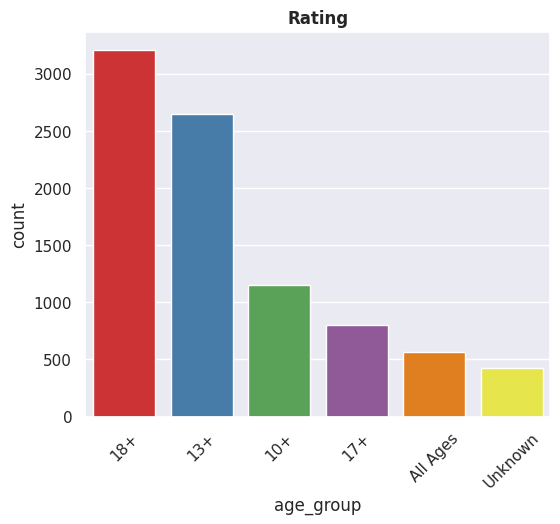

In [ ]:
plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
sns.countplot(x="age_group", data=data, palette="Set1", order=data['age_group'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating",fontweight="bold")
plt.show()

### Year added

/tmp/ipython-input-24-2489412828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year_added", data=data, palette="hot", order=data['year_added'].value_counts().index[0:15])


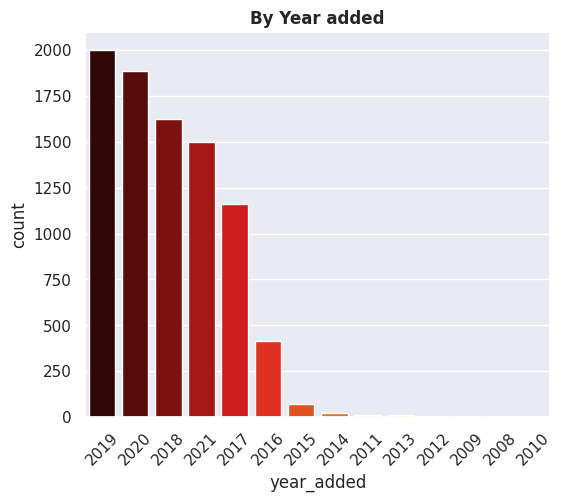

In [ ]:
# 計算每年上架數量
plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
sns.countplot(x="year_added", data=data, palette="hot", order=data['year_added'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("By Year added",fontweight="bold")
plt.show()

### Movie & Year_added

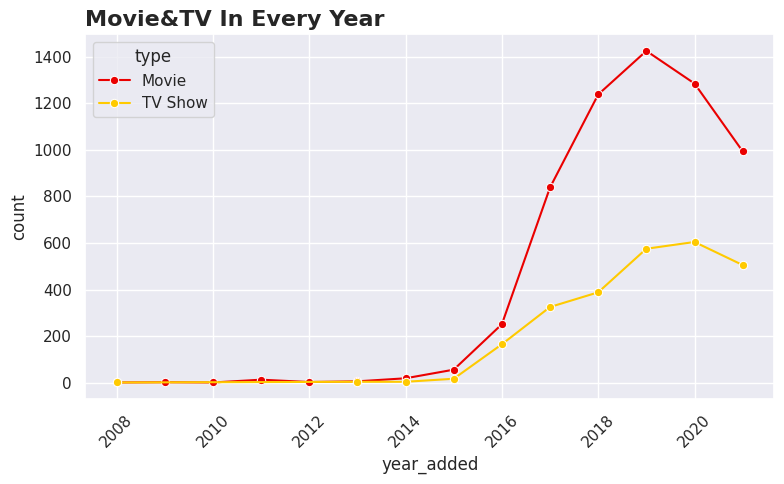

In [ ]:
# 計算每年Movie&TV show的數量
df_grouped = data.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.lineplot(data=df_grouped, x='year_added', y='count', hue='type', marker='o', palette="hot")

# 表標題與格式
plt.title("Movie&TV In Every Year", fontsize=16, fontweight='bold', loc='left')
plt.xlabel("year_added")
plt.ylabel("count")
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

### Country & Genres

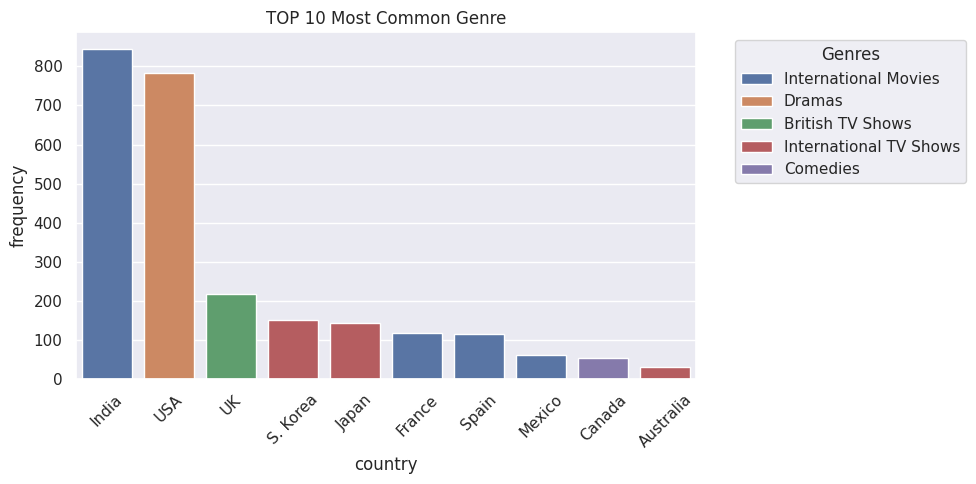

In [ ]:
# 各國最常製作的影片類型是什麼？

# 將 genres 欄位展開（每列一個類別）
data_exploded = data.explode('genres')
# 計算每個國家的影片數量，找出前 10 名的國家
top_10_countries = data['trans_country'].value_counts().head(10).index

# 篩選出前 10 名國家的資料
filtered_df = data_exploded[data_exploded['trans_country'].isin(top_10_countries)]

# 統計每個國家中各影片類型的出現次數
genre_counts_top10 = filtered_df.groupby(['trans_country', 'genres']).size().reset_index(name='count')

# 對每個國家找出出現次數最多的影片類型
top_genres_top10 = genre_counts_top10.sort_values('count', ascending=False).drop_duplicates('trans_country')

# 繪圖
plt.figure(figsize=(10, 5))
sns.barplot(data=top_genres_top10, x='trans_country', y='count', hue='genres')
plt.title("TOP 10 Most Common Genre")
plt.xlabel("country")
plt.ylabel("frequency")
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###  Gap Between Release Year and Netflix Added Year

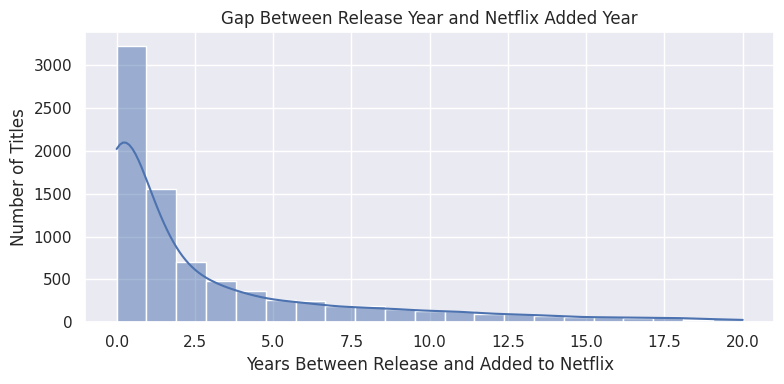

In [ ]:
# 確保 date_added 欄位為 datetime 格式
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# 統一處理方式轉成Int64
data['year_added'] = data['date_added'].dt.year.astype('Int64')
data['release_year'] = data['release_year'].astype('Int64')

# 計算年份落差
data['year_gap'] = data['year_added'] - data['release_year']

# 篩選合理年份範圍
filtered_df = data[(data['year_gap'].notnull()) & (data['year_gap'] >= 0) & (data['year_gap'] <= 20)]

# 繪圖
plt.figure(figsize=(8, 4))
sns.histplot(data=filtered_df, x='year_gap', bins=21, kde=True)
plt.title('Gap Between Release Year and Netflix Added Year')
plt.xlabel('Years Between Release and Added to Netflix')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

# 大多數影片在 0~2 年內就上架 Netflix，表示多數是當年度或近期內容。
# 也有一部分影片在 3~10 年後才上架，可能是經典重播或授權延遲。
# 少量影片甚至有 10 年以上的落差，這些可能是老片新上架。

### Top 10 Most Frequent Actor Collaborations


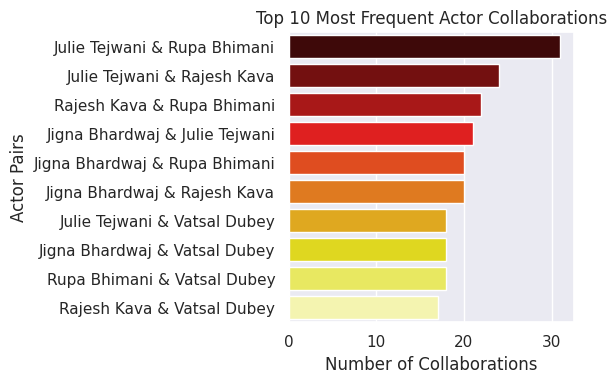

In [ ]:
from itertools import combinations
from collections import Counter

# 重新計算所有演員搭檔的出現次數
df_cast = data[data['cast'].notnull()].copy()
df_cast['cast'] = df_cast['cast'].str.split(', ')

# 計算所有演員組合（搭檔）的次數
pair_counter = Counter()
for cast_list in df_cast['cast']:
    if len(cast_list) > 1:
        pairs = combinations(sorted(cast_list), 2)
        pair_counter.update(pairs)

# 建立 DataFrame 並選出出現最多的前 10 組搭檔
pair_df = pd.DataFrame(pair_counter.items(), columns=['pair', 'count'])
pair_df[['actor1', 'actor2']] = pd.DataFrame(pair_df['pair'].tolist(), index=pair_df.index)
top_10_pairs = pair_df.sort_values('count', ascending=False).head(10)

# 繪製 seaborn 長條圖：橫軸為搭檔名稱（合併顯示），縱軸為合作次數
top_10_pairs['pair_label'] = top_10_pairs['actor1'] + " & " + top_10_pairs['actor2']

plt.figure(figsize=(6, 4))
sns.barplot(data=top_10_pairs, y='pair_label', x='count', palette='hot')
plt.title("Top 10 Most Frequent Actor Collaborations")
plt.xlabel("Number of Collaborations")
plt.ylabel("Actor Pairs")
plt.tight_layout()
plt.show()


### Distribution of Movies Duration

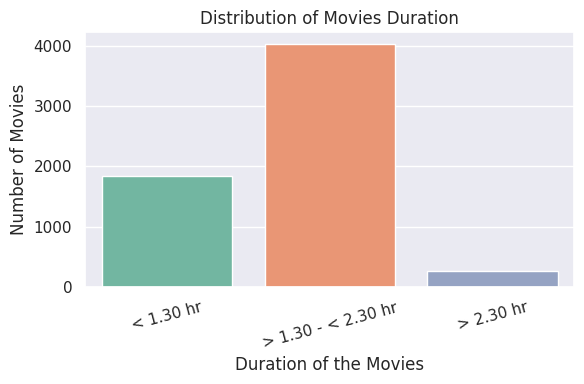

In [ ]:
# 篩選電影資料
movie_df = data[data['type'] == 'Movie'].copy()

# 將 duration 欄位中的時間轉為分鐘
movie_df['duration_min'] = movie_df['duration'].str.extract('(\d+)').astype(float)

# 建立分箱
bins = [0, 90, 150, 1000]
labels = ['< 1.30 hr', '> 1.30 - < 2.30 hr', '> 2.30 hr']
movie_df['duration_bin'] = pd.cut(movie_df['duration_min'], bins=bins, labels=labels, right=False)

# 繪製 seaborn 長條圖
plt.figure(figsize=(6, 4))
sns.countplot(data=movie_df, x='duration_bin', order=labels, palette="Set2")

plt.title("Distribution of Movies Duration")
plt.xlabel("Duration of the Movies")
plt.ylabel("Number of Movies")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Number of Titles Added to Netflix by Month

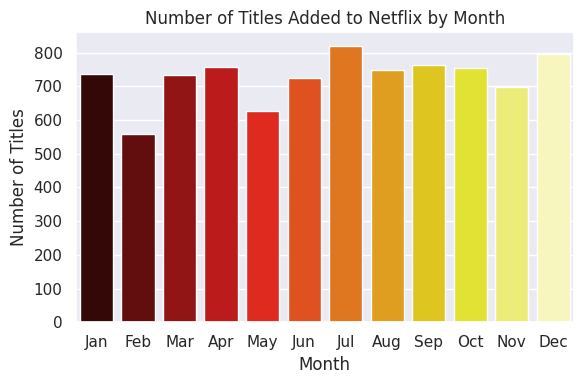

In [ ]:
# 從 date_added 中提取月份
data['month_added']=data['date_added'].dt.month.astype('Int64')

# 建立月份對應英文名稱以利圖表美觀
month_order = [1,2,3,4,5,6,7,8,9,10,11,12]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 繪製每月上架影片數量的長條圖
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='month_added', order=month_order, palette='hot')

# 美化圖表
plt.title("Number of Titles Added to Netflix by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(ticks=range(12), labels=month_labels)
plt.tight_layout()
plt.show()
